## Full implementation

In [4]:
#create nomoi set with all nomous

def create_nomous_set(filename):
    
    with open(filename, 'r', encoding='utf-8') as f:
        lines_nomoi = f.readlines()
    lines_nomoi.pop(0) #delete first line
    
    for i in range(len(lines_nomoi)):
        lines_nomoi[i] = lines_nomoi[i].strip() #remove whitespaces and \n chars
        lines_nomoi[i] = lines_nomoi[i].split()[-1]
    
    nomoi = set(lines_nomoi)
    return nomoi

# Dataframe creation from source files

import pandas as pd
import numpy as np

filename = 'lista_petsa.txt' #our data, without the programmatic advertising platforms
dict_for_df = {'AA':None, 'ΚΑΤΗΓΟΡΙΑ ΜΕΣΟΥ':None, 'ΟΝΟΜΑ ΜΕΣΟΥ':None, 'ΝΟΜΟΣ':None, 'ΠΟΣΟ ΒΑΣΕΙ ΕΝΤΟΛΩΝ':None, 
               'ΤΙΜΟΛΟΓΗΜΕΝΟ ΠΟΣΟ (ΠΡΟ ΚΡΑΤΗΣΕΩΝ)':None, 'ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ':None}
aa_list = []
katigoria_mesou_list = []
onoma_mesou_list = []
nomoi_list = []
poso_vasei_entolwn_list=[]
timologimeno_poso_list = []
sinoliki_axia_list = []
nomoi_set = create_nomous_set('nomoi.txt')

with open(filename, 'r', encoding='utf-8') as f: #read data
    lines = f.readlines() #returns a list with each line as an element

#preprocessing

for i in range(len(lines)): #operations to happen for each line of lista petsa
    nomoi_list.append(None) #initially setting this to None for when it's missing as a data
    
    cur_line = lines[i] #current_line being processed
    cur_line = cur_line.strip() #remove whitespaces or end of line chars at beginning and at the end of each line
    cur_line_list = cur_line.split() #make a list out of the current line's long string

    axia_me_fpa = float(cur_line_list[-1].replace('.','').replace(',','.'))
    cur_line_list.pop() #remove last element

    timologimeno_poso = float(cur_line_list[-1].replace('.','').replace(',','.'))
    cur_line_list.pop()
    
    poso_vasei_entolwn = float(cur_line_list[-1].replace('.','').replace(',','.'))
    cur_line_list.pop()
    
    index = int(cur_line_list[0])
    cur_line_list.pop(0) #remove first element
    
    media_type = cur_line_list.pop(0) #remove first element and assign it to media type
    
    for j in range(len(cur_line_list)): #check for nomos existence within the list
        if cur_line_list[j] in nomoi_set: #if there is nomos included in the strings
            nomoi_list[-1] = cur_line_list[j] #replace None initially set with the nomos values
            cur_line_list.pop(j) #remove the item from the list
            break #if found, nomoi field updated and can now exit the loop
        
    onoma_mesou = " ".join(cur_line_list) #join the remaining strings
    
    aa_list.append(index)
    katigoria_mesou_list.append(media_type)
    onoma_mesou_list.append(onoma_mesou)
    #nomoi_list.append() already implemented at the beginning of loop
    poso_vasei_entolwn_list.append(poso_vasei_entolwn)
    timologimeno_poso_list.append(timologimeno_poso)
    sinoliki_axia_list.append(axia_me_fpa)

dict_for_df = {'AA':aa_list, 'ΚΑΤΗΓΟΡΙΑ ΜΕΣΟΥ':katigoria_mesou_list, 'ΟΝΟΜΑ ΜΕΣΟΥ':onoma_mesou_list, 
               'ΝΟΜΟΣ':nomoi_list, 'ΠΟΣΟ ΒΑΣΕΙ ΕΝΤΟΛΩΝ':poso_vasei_entolwn_list, 
               'ΤΙΜΟΛΟΓΗΜΕΝΟ ΠΟΣΟ (ΠΡΟ ΚΡΑΤΗΣΕΩΝ)':timologimeno_poso_list, 'ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ':sinoliki_axia_list}
df = pd.DataFrame(dict_for_df)

In [5]:
df

,AA,ΚΑΤΗΓΟΡΙΑ ΜΕΣΟΥ,ΟΝΟΜΑ ΜΕΣΟΥ,ΝΟΜΟΣ,ΠΟΣΟ ΒΑΣΕΙ ΕΝΤΟΛΩΝ,ΤΙΜΟΛΟΓΗΜΕΝΟ ΠΟΣΟ (ΠΡΟ ΚΡΑΤΗΣΕΩΝ),ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ
0,1,ΕΝΤΥΠΟ,AGRENDA,None,6000.0,6000.0,7440.00
1,2,ΕΝΤΥΠΟ,ANAΓΝΩΣΤΗΣ ΕΛΑΣΣΟΝΑΣ,ΛΑΡΙΣΗΣ,1500.0,1500.0,1860.00
2,3,ΕΝΤΥΠΟ,ATHENS REVIEW OF BOOKS,ΑΤΤΙΚΗΣ,5000.0,5000.0,6200.00
3,4,ΕΝΤΥΠΟ,AXIANEWS,None,6000.0,6000.0,7440.00
4,5,ΕΝΤΥΠΟ,DEAL NEWS,None,5000.0,5000.0,6200.00
...,...,...,...,...,...,...,...
1227,1228,ΤΗΛΕΟΡΑΣΗ,ΣΑΜΙΑΚΗ,ΣΑΜΟΥ,5000.0,5000.0,5850.00
1228,1229,ΤΗΛΕΟΡΑΣΗ,ΣΗTEIA TV,ΛΑΣΙΘΙΟΥ,3000.0,3000.0,3720.00
1229,1230,ΤΗΛΕΟΡΑΣΗ,ΤRT TV,ΜΑΓΝΗΣΙΑΣ,25000.0,25063.0,31078.12
1230,1231,ΤΗΛΕΟΡΑΣΗ,ΤV MYTILINI,ΛΕΣΒΟΥ,5000.0,5000.0,6200.00


In [6]:
df['ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ'].sum() #συνολο διαφημισεων της λιστας πετσα

18374267.93

In [7]:
df.groupby(['ΚΑΤΗΓΟΡΙΑ ΜΕΣΟΥ'])['ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ'].sum() #spent amout for each media type

ΚΑΤΗΓΟΡΙΑ ΜΕΣΟΥ
ΕΝΤΥΠΟ        2276713.45
ΙΣΤΟΣΕΛΙΔΑ    7516512.00
ΡΑΔΙΟΦΩΝΟ     2082460.22
ΤΗΛΕΟΡΑΣΗ     6498582.26
Name: ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ, dtype: float64

In [8]:
df_sorted_by_amount = df.sort_values("ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ", ascending = False)
df_sorted_by_amount.head(20) #get the first 20 lines of the media that got the most money

,AA,ΚΑΤΗΓΟΡΙΑ ΜΕΣΟΥ,ΟΝΟΜΑ ΜΕΣΟΥ,ΝΟΜΟΣ,ΠΟΣΟ ΒΑΣΕΙ ΕΝΤΟΛΩΝ,ΤΙΜΟΛΟΓΗΜΕΝΟ ΠΟΣΟ (ΠΡΟ ΚΡΑΤΗΣΕΩΝ),ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ
1188,1189,ΤΗΛΕΟΡΑΣΗ,SKAI,None,830000.0,830000.0,1029200.00
1151,1152,ΤΗΛΕΟΡΑΣΗ,ANTENNA,None,780000.0,779991.0,967188.84
1190,1191,ΤΗΛΕΟΡΑΣΗ,STAR,None,730000.0,729892.0,905066.08
1150,1151,ΤΗΛΕΟΡΑΣΗ,ALPHA,None,680000.0,679483.0,842558.92
1183,1184,ΤΗΛΕΟΡΑΣΗ,OPEN,None,450000.0,449650.0,557566.00
1180,1181,ΤΗΛΕΟΡΑΣΗ,MEGA,None,380000.0,379456.5,470526.06
1214,1215,ΤΗΛΕΟΡΑΣΗ,"ΕΡΤ 1,2,3, SPORTS",None,270000.0,269933.0,334716.92
516,517,ΙΣΤΟΣΕΛΙΔΑ,IN.GR,None,253000.0,253000.0,313720.00
502,503,ΙΣΤΟΣΕΛΙΔΑ,IEFIMERIDA.GR,None,250000.0,250000.0,310000.00
748,749,ΙΣΤΟΣΕΛΙΔΑ,PROTOTHEMA.GR,None,250000.0,250000.0,310000.00


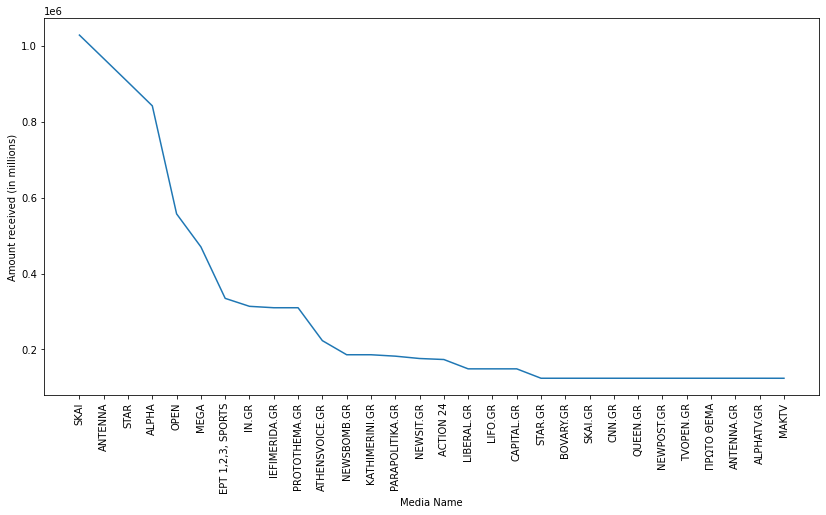

In [17]:
import matplotlib.pyplot as plt

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.subplots(figsize=(1000*px , 500*px))
plt.plot(df_sorted_by_amount.head(30)['ΟΝΟΜΑ ΜΕΣΟΥ'], df_sorted_by_amount.head(30)['ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ'])
plt.xlabel("Media Name")
plt.ylabel("Amount received (in millions)")
plt.xticks(rotation=90)
plt.show()

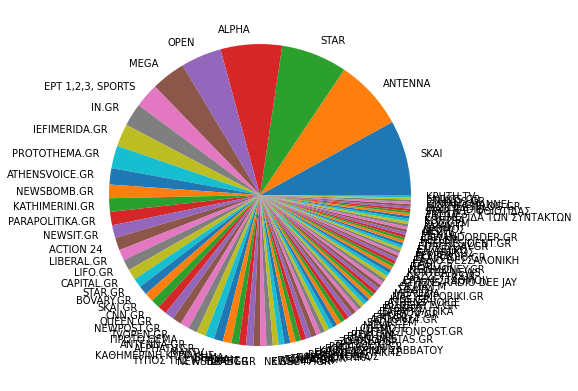

In [24]:
plt.subplots(figsize=(1000*px , 500*px))
plt.pie(x = df_sorted_by_amount.head(100)['ΣΥΝΟΛΙΚΗ ΑΞΙΑ ΜΕ ΦΠΑ'], labels = df_sorted_by_amount.head(100)['ΟΝΟΜΑ ΜΕΣΟΥ'])
pass